In [1]:
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from mtdnetwork.statistic.utils import decorate, savefig
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from joblib import Parallel, delayed

from run import dap_mtd_simulation

current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')


In [2]:
# Define the number of iterations and the lists to append to
n_iterations = 10

# Run the for loop in parallel using joblib
results = Parallel(n_jobs=-1)(
    delayed(dap_mtd_simulation)() for i in range(n_iterations)
)

In [3]:
# item_num = min([len(result) for result in dap_results_mttc])
# for i in range(item_num):
#     dap_results_mttc_avg.append({
#         'Name': dap_results_mttc[0][i]['Name'][0],
#         'Target Compromise %':dap_results_mttc[0][i]['Target Compromise %'],
#         'MTD Interval': dap_results_mttc[0][i]['MTD Interval'],
#         'Mean Time to Compromise (s)': sum([r[i]['Mean Time to Compromise'] for r in dap_results_mttc]) / len(dap_results_mttc),
#     })
# pd.DataFrame(dap_results_mttc_avg).to_csv('experimental_data/dap_mtd_sim_mttc.csv', index=False)
results_avg = []
item_num = min([len(result) for result in results])
for i in range(item_num):
    mttc_i_list = [r[i]['time_to_compromise'] for r in results if r[i]['host_compromise_ratio'] != 0]
    if mttc_i_list:
        mttc_i = sum(mttc_i_list) / len(mttc_i_list)
        results_avg.append({
            'Name': results[0][i]['Name'],
            'Host Compromise ratio (compromised hosts / total hosts)':results[0][i]['host_compromise_ratio'],
            'MTD Interval': results[0][i]['mtd_interval'],
            'Network Size': results[0][i]['network_size'],
            'MTD Execution Frequency': sum([r[i]['MEF'] for r in results]) / len(results),
            'Attack Success Rate': sum([r[i]['ASR'] for r in results]) / len(results),
            'Mean Time to Compromise (s)': mttc_i,
        })
pd.DataFrame(results_avg).to_csv('experimental_data/results/dap_mtd_sim.csv', index=False)

In [4]:
results_avg = pd.read_csv("experimental_data/results/dap_mtd_sim.csv")
# single_results_avg = pd.read_csv("experimental_data/single_mtd_sim.csv")
# single_results_mttc_avg = pd.read_csv("experimental_data/single_mtd_sim_mttc.csv")

# if len(dap_results_avg[dap_results_avg['Name'] == 'NoMTD']) == 0:
#     dap_results_avg = dap_results_avg.append(single_results_avg[((single_results_avg['Name'] == 'OSDiversity') | (single_results_avg['Name'] == 'NoMTD')) & ((single_results_avg['MTD Interval'] == 100) | (single_results_avg['MTD Interval'] == 130))])
#     dap_results_mttc_avg = dap_results_mttc_avg.append(single_results_mttc_avg[((single_results_mttc_avg['Name'] == 'NoMTD') | (single_results_mttc_avg['Name'] == 'OSDiversity')) & ((single_results_mttc_avg['MTD Interval'] == 100) | (single_results_mttc_avg['MTD Interval'] == 130))])


## Mean Time to Compromise with Different MTD Triggering Interval in 10000s simulation time

Saving figure to file experimental_data/plots/dap_mttc_ratio_size.jpg


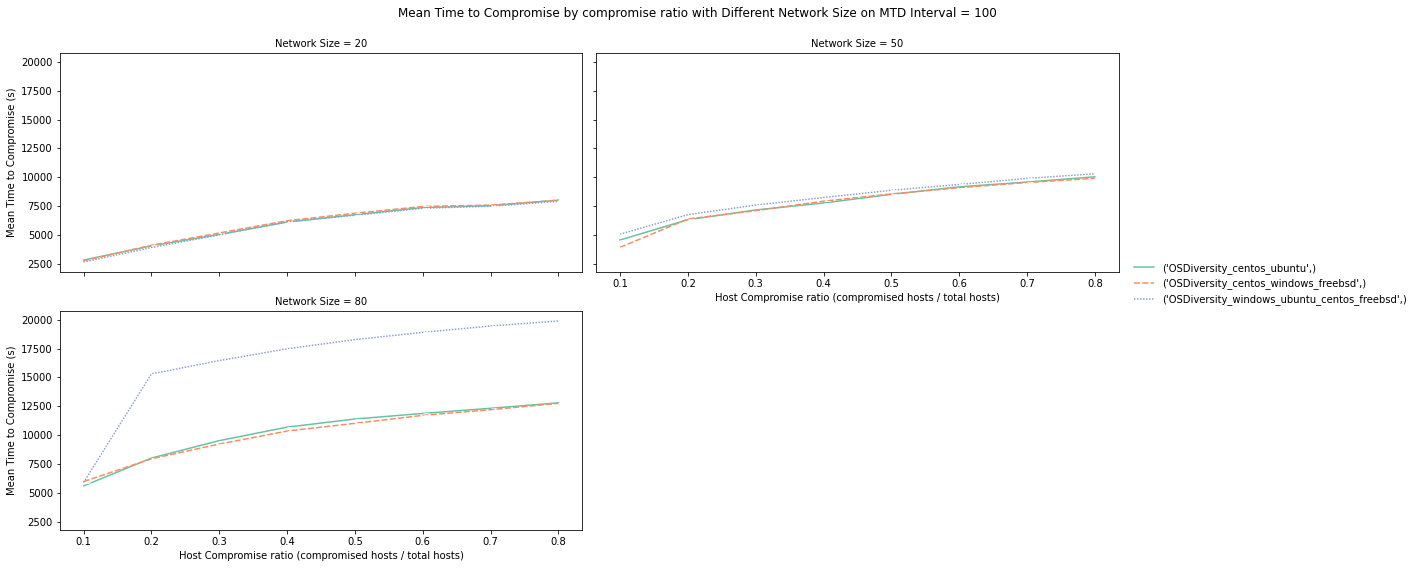

In [5]:
# dap_results_mttc_avg = dap_results_mttc_avg[dap_results_mttc_avg['MTD Interval'] == 100]
# plt.figure(figsize=(17, 10))
# sns.lineplot(data=dap_results_mttc_avg, x='Time', y='Mean Time to Compromise', hue='Name', style='Name', markers=True, dashes=False)
# plt.show()
# g = sns.FacetGrid(dap_results_mttc_avg, col="MTD Interval",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
# g.map_dataframe(sns.lineplot, x="Time", y="Mean Time to Compromise", style='Name', hue='Name', markers=True)
# g.add_legend()
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle('The Mean Time to Compromise a host with different MTD Interval in 10000s simulation time')
# savefig('experimental_data/dap_mtd_sim_mttc.jpg')
# plt.show()


# g = sns.FacetGrid(dap_results_mttc_avg, col="MTD Interval",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
# g.map_dataframe(sns.barplot, x="Target Compromise %", y="Mean Time to Compromise (s)", hue='Name', palette='Set2')
# g.add_legend()
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle('The Mean Time to Compromise a host with different MTD Interval in 10000s simulation time')
# savefig('experimental_data/dap_results_mttc_avg.jpg')
# plt.show()

mttc_ratio_size_results = results_avg[results_avg['MTD Interval']==100]

g = sns.FacetGrid(mttc_ratio_size_results, col="Network Size",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.lineplot, x="Host Compromise ratio (compromised hosts / total hosts)", y="Mean Time to Compromise (s)", hue='Name', style='Name', marker=True, palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Time to Compromise by compromise ratio with Different Network Size on MTD Interval = 100')
savefig('experimental_data/plots/dap_mttc_ratio_size.jpg')
plt.show()

## Mean Time to Compromise by Different Network Size with different MTD Interval on Host Compromise ratio = 0.8

Saving figure to file experimental_data/plots/dap_mttc_size_interval.jpg


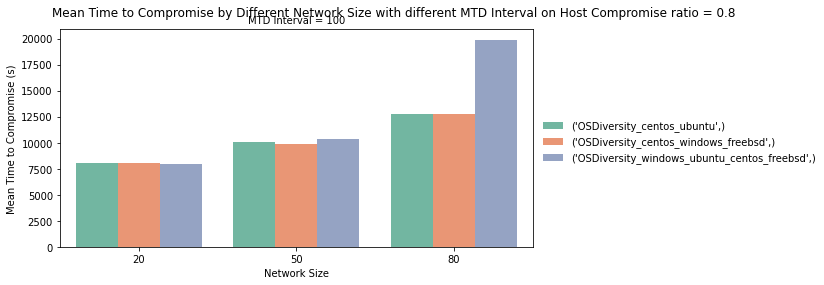

In [6]:
mttc_size_interval_results = results_avg[results_avg['Host Compromise ratio (compromised hosts / total hosts)']==0.8]

g = sns.FacetGrid(mttc_size_interval_results, col="MTD Interval",  col_wrap=1, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.barplot, x="Network Size", y="Mean Time to Compromise (s)", hue='Name', palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Time to Compromise by Different Network Size with different MTD Interval on Host Compromise ratio = 0.8')
savefig('experimental_data/plots/dap_mttc_size_interval.jpg')
plt.show()

## Attack Success Rate by Network Size with Different MTD Interval

Saving figure to file experimental_data/plots/dap_asr_interval_size.jpg


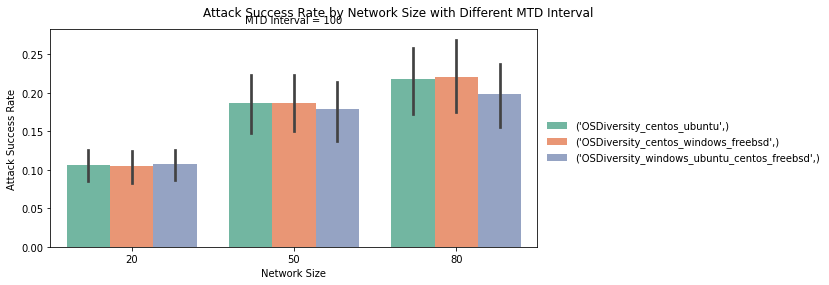

In [7]:
g = sns.FacetGrid(results_avg, col="MTD Interval",  col_wrap=1, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.barplot, x="Network Size", y="Attack Success Rate", hue='Name', palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Attack Success Rate by Network Size with Different MTD Interval')
savefig('experimental_data/plots/dap_asr_interval_size.jpg')
plt.show()